<a href="https://colab.research.google.com/github/ounospanas/AIDL_A_02/blob/main/notebooks_solutions/AIDL_A02_ASL_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download ASL data from Kaggle
https://www.kaggle.com/general/74235

1. Create a Kaggle account or link it with an existing one (e.g., Gmail).

2. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

3. Click on Create New API Token - It will download kaggle.json file on your machine.

In [1]:
# install library
! pip install -q kaggle

In [2]:
# import files class to upload files to colab
from google.colab import files

In [3]:
# upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pkasnesis","key":"fb11c2b7e6744f1aad0fb1224994e01c"}'}

In [4]:
# Make directory named kaggle and copy kaggle.json file there.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Download asl dataset and unzip to asl folder
! kaggle datasets download 'grassknoted/asl-alphabet'
! mkdir asl
! unzip asl-alphabet.zip  -d asl

Streaming output truncated to the last 5000 lines.
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl/asl_alphabet_train/asl_alphabet_train/nothin

In [6]:
ls

asl/  asl-alphabet.zip  kaggle.json  sample_data/


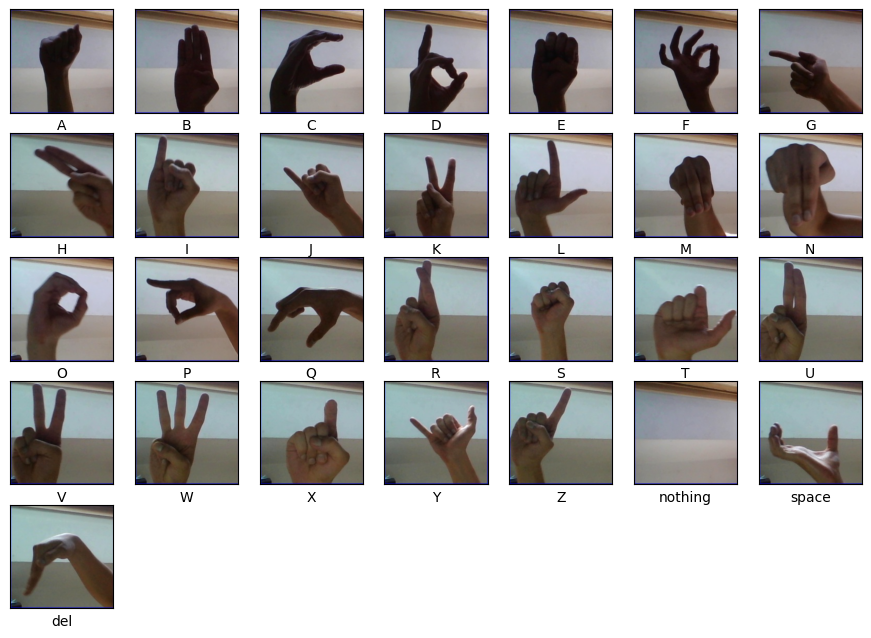

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from time import time
import os
import cv2
import numpy as np
%matplotlib inline

train_dir = 'asl/asl_alphabet_train/asl_alphabet_train'
test_dir = 'asl/asl_alphabet_test/asl_alphabet_test'
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']
plt.figure(figsize=(11, 11))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

In [8]:
def load_data(train_dir):
    images = []
    labels = []
    size = 32,32
    index = -1
    for folder in os.listdir(train_dir):
        index +=1
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)

    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, random_state = 0)

    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = load_data(train_dir)

Loaded 78300 images for training, Train data shape = (78300, 32, 32, 3)
Loaded 8700 images for testing Test data shape = (8700, 32, 32, 3)


In [9]:
# delibately decrease the train size to make the task more difficult for the project
x_train_ = x_train[5000:10000]
y_train_ = y_train[5000:10000]

# TO DO

#Train custom CCN Network (no tranfer learning or any kind of data augmentation or data preprocessing!)

1. Use a validation set 10% from train with seed = 100
2. Save model during training. I.e., best validation loss
3. Obtain the classication results from the test set.
4. Achieve over 96% accuracy in the test set

In [10]:
# You can import more tensorflow.keras.layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

In [11]:
classes = 29
batch = 128 #You can change this
epochs = 300 #You can change this
optimizer = 'adam' #You can change this

In [12]:
 # DO NOT change this
x_train_n, x_val, y_train_n, y_val = train_test_split(x_train_, y_train_, test_size = 0.1, random_state = 100)

In [13]:
#You can change this

model = Sequential()
model.add(Conv2D(16 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (32,32,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.5))

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.5))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
save_model = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=2)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(x_train_n, y_train_n, batch_size=batch, epochs=epochs, validation_data=(x_val, y_val), shuffle = True, verbose=1,
                    callbacks=[save_model])

Epoch 1/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.0494 - loss: 4.4387
Epoch 1: val_loss improved from inf to 3.54118, saving model to best_model.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 206ms/step - accuracy: 0.0499 - loss: 4.4201 - val_accuracy: 0.0380 - val_loss: 3.5412
Epoch 2/300
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1116 - loss: 3.0925
Epoch 2: val_loss did not improve from 3.54118
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1127 - loss: 3.0880 - val_accuracy: 0.0380 - val_loss: 6.7745
Epoch 3/300
32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1630 - loss: 2.8564
Epoch 3: val_loss did not improve from 3.54118
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1633 - loss: 2.8541 - val_accuracy: 0.0380 - val_loss: 11.2986
Epoch 4/300
32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2005 - loss: 2.6910
Epoch 4: val_loss did not improve from 3.54118
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2023 - loss: 2.6836 - val_accuracy: 0.0380 - val_loss: 18.3064
Epoch 5/300
29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2461 - loss: 2.5463
Epoch 5: val_loss did not improve from 3.54118
36/36 ━

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5888 - loss: 1.2290 - val_accuracy: 0.3900 - val_loss: 2.3371
Epoch 19/300
35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6077 - loss: 1.1862
Epoch 19: val_loss did not improve from 2.33712
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6077 - loss: 1.1865 - val_accuracy: 0.3680 - val_loss: 3.0023
Epoch 20/300
28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6378 - loss: 1.1264
Epoch 20: val_loss did not improve from 2.33712
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6388 - loss: 1.1225 - val_accuracy: 0.3980 - val_loss: 2.5782
Epoch 21/300
28/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6512 - loss: 1.0573
Epoch 21: val_loss did not improve from 2.33712
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6495 - loss: 1.0606 - val_accuracy: 0.4060 - val_loss: 2.5016
Epoch 22/300
32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6406 - loss: 1.0423
Epoch 22: val_loss improved from 2.33712 to 1.78828

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6401 - loss: 1.0455 - val_accuracy: 0.5040 - val_loss: 1.7883
Epoch 23/300
30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6641 - loss: 1.0139
Epoch 23: val_loss did not improve from 1.78828
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6617 - loss: 1.0128 - val_accuracy: 0.2640 - val_loss: 5.8495
Epoch 24/300
33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6521 - loss: 1.0133
Epoch 24: val_loss did not improve from 1.78828
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6526 - loss: 1.0116 - val_accuracy: 0.4860 - val_loss: 2.0890
Epoch 25/300
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6648 - loss: 0.9558
Epoch 25: val_loss improved from 1.78828 to 0.99607, saving model to best_model.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6663 - loss: 0.9545 - val_accuracy: 0.6820 - val_loss: 0.9961
Epoch 26/300
30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6947 - loss: 0.8784
Epoch 26: val_loss did not improve from 0.99607
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6950 - loss: 0.8809 - val_accuracy: 0.4380 - val_loss: 2.8229
Epoch 27/300
33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7030 - loss: 0.8802
Epoch 27: val_loss did not improve from 0.99607
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7030 - loss: 0.8813 - val_accuracy: 0.6800 - val_loss: 0.9969
Epoch 28/300
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7034 - loss: 0.8817
Epoch 28: val_loss improved from 0.99607 to 0.77707, saving model to best_model.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7041 - loss: 0.8788 - val_accuracy: 0.7400 - val_loss: 0.7771
Epoch 29/300
33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7224 - loss: 0.8305
Epoch 29: val_loss did not improve from 0.77707
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7221 - loss: 0.8297 - val_accuracy: 0.7180 - val_loss: 0.8343
Epoch 30/300
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7298 - loss: 0.7624
Epoch 30: val_loss did not improve from 0.77707
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7296 - loss: 0.7644 - val_accuracy: 0.6680 - val_loss: 1.0039
Epoch 31/300
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7545 - loss: 0.7306
Epoch 31: val_loss did not improve from 0.77707
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7539 - loss: 0.7312 - val_accuracy: 0.6100 - val_loss: 1.4593
Epoch 32/300
33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7405 - loss: 0.7585
Epoch 32: val_loss did not improve from 0.77707
36/3

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7589 - loss: 0.6886 - val_accuracy: 0.7600 - val_loss: 0.7269
Epoch 35/300
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7704 - loss: 0.6763
Epoch 35: val_loss improved from 0.72686 to 0.66328, saving model to best_model.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7702 - loss: 0.6770 - val_accuracy: 0.7700 - val_loss: 0.6633
Epoch 36/300
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7594 - loss: 0.6681
Epoch 36: val_loss did not improve from 0.66328
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7597 - loss: 0.6686 - val_accuracy: 0.7000 - val_loss: 0.9000
Epoch 37/300
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7784 - loss: 0.6377
Epoch 37: val_loss did not improve from 0.66328
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7780 - loss: 0.6396 - val_accuracy: 0.6460 - val_loss: 1.4699
Epoch 38/300
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7704 - loss: 0.6652
Epoch 38: val_loss did not improve from 0.66328
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7711 - loss: 0.6626 - val_accuracy: 0.5360 - val_loss: 2.1454
Epoch 39/300
32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7862 - loss: 0.6246
Epoch 39: val_loss did not improve from 0.66328
36/3

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8196 - loss: 0.5251 - val_accuracy: 0.8400 - val_loss: 0.4459
Epoch 48/300
33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8125 - loss: 0.5363
Epoch 48: val_loss did not improve from 0.44593
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8130 - loss: 0.5341 - val_accuracy: 0.8300 - val_loss: 0.5083
Epoch 49/300
32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8181 - loss: 0.5254
Epoch 49: val_loss did not improve from 0.44593
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8183 - loss: 0.5258 - val_accuracy: 0.6100 - val_loss: 1.4833
Epoch 50/300
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8286 - loss: 0.4875
Epoch 50: val_loss improved from 0.44593 to 0.39997, saving model to best_model.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8280 - loss: 0.4883 - val_accuracy: 0.8580 - val_loss: 0.4000
Epoch 51/300
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8301 - loss: 0.4821
Epoch 51: val_loss did not improve from 0.39997
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8305 - loss: 0.4817 - val_accuracy: 0.8220 - val_loss: 0.5973
Epoch 52/300
35/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8343 - loss: 0.4689
Epoch 52: val_loss did not improve from 0.39997
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8341 - loss: 0.4696 - val_accuracy: 0.6840 - val_loss: 1.0288
Epoch 53/300
32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8438 - loss: 0.4723
Epoch 53: val_loss did not improve from 0.39997
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8428 - loss: 0.4729 - val_accuracy: 0.7940 - val_loss: 0.6723
Epoch 54/300
32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8306 - loss: 0.4574
Epoch 54: val_loss did not improve from 0.39997
36/

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8493 - loss: 0.4270 - val_accuracy: 0.8780 - val_loss: 0.3623
Epoch 61/300
29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8535 - loss: 0.4055
Epoch 61: val_loss did not improve from 0.36234
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8521 - loss: 0.4101 - val_accuracy: 0.8580 - val_loss: 0.4135
Epoch 62/300
29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8733 - loss: 0.3605
Epoch 62: val_loss did not improve from 0.36234
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8702 - loss: 0.3694 - val_accuracy: 0.8820 - val_loss: 0.3977
Epoch 63/300
32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8484 - loss: 0.4274
Epoch 63: val_loss did not improve from 0.36234
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8487 - loss: 0.4270 - val_accuracy: 0.7580 - val_loss: 0.7986
Epoch 64/300
33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8615 - loss: 0.3901
Epoch 64: val_loss did not improve from 0.36234
36/3

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8844 - loss: 0.3394 - val_accuracy: 0.8880 - val_loss: 0.3483
Epoch 76/300
32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8775 - loss: 0.3546
Epoch 76: val_loss did not improve from 0.34827
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8786 - loss: 0.3520 - val_accuracy: 0.8800 - val_loss: 0.3797
Epoch 77/300
30/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8873 - loss: 0.3297
Epoch 77: val_loss did not improve from 0.34827
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8867 - loss: 0.3306 - val_accuracy: 0.8460 - val_loss: 0.4326
Epoch 78/300
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8808 - loss: 0.3417
Epoch 78: val_loss improved from 0.34827 to 0.30796, saving model to best_model.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8811 - loss: 0.3404 - val_accuracy: 0.8940 - val_loss: 0.3080
Epoch 79/300
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8863 - loss: 0.3350
Epoch 79: val_loss did not improve from 0.30796
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8862 - loss: 0.3350 - val_accuracy: 0.8800 - val_loss: 0.4307
Epoch 80/300
33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8945 - loss: 0.3082
Epoch 80: val_loss did not improve from 0.30796
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8939 - loss: 0.3094 - val_accuracy: 0.8140 - val_loss: 0.6932
Epoch 81/300
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8764 - loss: 0.3278
Epoch 81: val_loss did not improve from 0.30796
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8770 - loss: 0.3276 - val_accuracy: 0.8380 - val_loss: 0.4911
Epoch 82/300
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8930 - loss: 0.3071
Epoch 82: val_loss improved from 0.30796 to 0.28796,

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8927 - loss: 0.3083 - val_accuracy: 0.9080 - val_loss: 0.2880
Epoch 83/300
33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9005 - loss: 0.2838
Epoch 83: val_loss did not improve from 0.28796
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8998 - loss: 0.2855 - val_accuracy: 0.8480 - val_loss: 0.5575
Epoch 84/300
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8973 - loss: 0.2978
Epoch 84: val_loss did not improve from 0.28796
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8973 - loss: 0.2975 - val_accuracy: 0.8360 - val_loss: 0.5065
Epoch 85/300
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8907 - loss: 0.3244
Epoch 85: val_loss did not improve from 0.28796
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8906 - loss: 0.3242 - val_accuracy: 0.8560 - val_loss: 0.4920
Epoch 86/300
33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8934 - loss: 0.3051
Epoch 86: val_loss did not improve from 0.28796
36/3

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9101 - loss: 0.2543 - val_accuracy: 0.9160 - val_loss: 0.2715
Epoch 95/300
32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8939 - loss: 0.3088
Epoch 95: val_loss improved from 0.27155 to 0.24865, saving model to best_model.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8948 - loss: 0.3066 - val_accuracy: 0.9180 - val_loss: 0.2486
Epoch 96/300
32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9054 - loss: 0.2807
Epoch 96: val_loss did not improve from 0.24865
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9055 - loss: 0.2806 - val_accuracy: 0.8760 - val_loss: 0.4466
Epoch 97/300
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9141 - loss: 0.2610
Epoch 97: val_loss improved from 0.24865 to 0.23423, saving model to best_model.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9138 - loss: 0.2609 - val_accuracy: 0.9180 - val_loss: 0.2342
Epoch 98/300
33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9005 - loss: 0.2765
Epoch 98: val_loss did not improve from 0.23423
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9002 - loss: 0.2772 - val_accuracy: 0.8880 - val_loss: 0.3590
Epoch 99/300
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9068 - loss: 0.2809
Epoch 99: val_loss did not improve from 0.23423
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9068 - loss: 0.2807 - val_accuracy: 0.8340 - val_loss: 0.6637
Epoch 100/300
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9055 - loss: 0.2527
Epoch 100: val_loss did not improve from 0.23423
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9056 - loss: 0.2535 - val_accuracy: 0.8720 - val_loss: 0.4333
Epoch 101/300
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9082 - loss: 0.2541
Epoch 101: val_loss did not improve from 0.23423


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9245 - loss: 0.2139 - val_accuracy: 0.9300 - val_loss: 0.2303
Epoch 141/300
32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9174 - loss: 0.2325
Epoch 141: val_loss did not improve from 0.23033
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9171 - loss: 0.2340 - val_accuracy: 0.8860 - val_loss: 0.3657
Epoch 142/300
33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9358 - loss: 0.1824
Epoch 142: val_loss did not improve from 0.23033
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9352 - loss: 0.1839 - val_accuracy: 0.8780 - val_loss: 0.5138
Epoch 143/300
33/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9386 - loss: 0.1785
Epoch 143: val_loss did not improve from 0.23033
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9381 - loss: 0.1801 - val_accuracy: 0.9160 - val_loss: 0.3485
Epoch 144/300
32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9328 - loss: 0.1836
Epoch 144: val_loss did not improve from 0.23

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9530 - loss: 0.1435 - val_accuracy: 0.9460 - val_loss: 0.2189
Epoch 163/300
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9455 - loss: 0.1489
Epoch 163: val_loss did not improve from 0.21891
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9456 - loss: 0.1487 - val_accuracy: 0.9240 - val_loss: 0.2695
Epoch 164/300
29/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9444 - loss: 0.1692
Epoch 164: val_loss improved from 0.21891 to 0.20972, saving model to best_model.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9452 - loss: 0.1657 - val_accuracy: 0.9520 - val_loss: 0.2097
Epoch 165/300
32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9396 - loss: 0.1667
Epoch 165: val_loss improved from 0.20972 to 0.16728, saving model to best_model.h5


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9400 - loss: 0.1658 - val_accuracy: 0.9400 - val_loss: 0.1673
Epoch 166/300
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9449 - loss: 0.1632
Epoch 166: val_loss did not improve from 0.16728
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9455 - loss: 0.1621 - val_accuracy: 0.9220 - val_loss: 0.3253
Epoch 167/300
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9510 - loss: 0.1651
Epoch 167: val_loss did not improve from 0.16728
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9499 - loss: 0.1661 - val_accuracy: 0.8780 - val_loss: 0.4984
Epoch 168/300
31/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9375 - loss: 0.1712
Epoch 168: val_loss did not improve from 0.16728
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9380 - loss: 0.1701 - val_accuracy: 0.9140 - val_loss: 0.3290
Epoch 169/300
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9470 - loss: 0.1385
Epoch 169: val_loss did not improve from 0.16

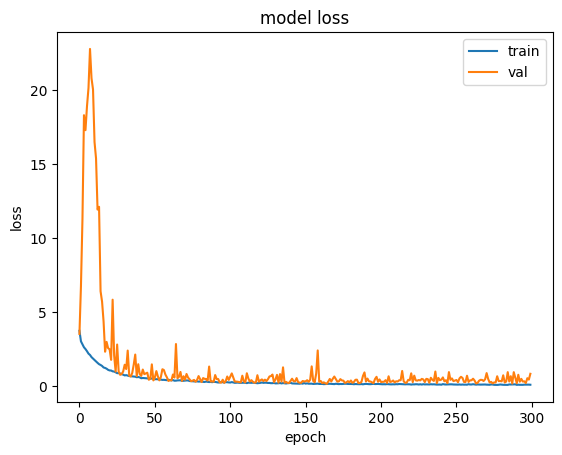

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

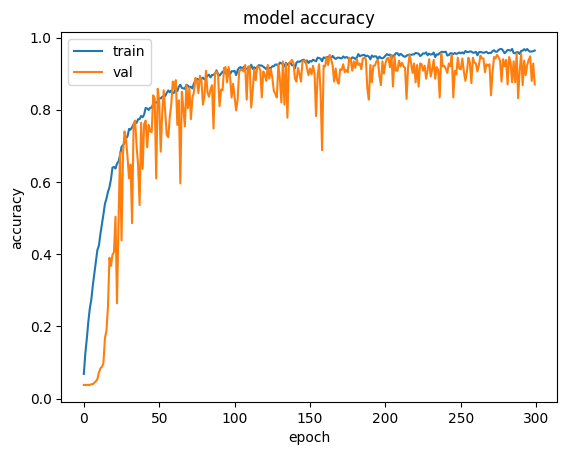

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
history.model.load_weights('best_model.h5')
test_acc = np.mean(np.argmax(history.model.predict(x_test),1)==np.argmax(y_test,1))
print('The submitted model has test accuracy equal to {}'.format(test_acc))

272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
The submitted model has test accuracy equal to 0.9286206896551724


In [18]:
np.mean(np.argmax(history.model.predict(x_train_n),1)==np.argmax(y_train_n,1))

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


np.float64(0.9946666666666667)

In [19]:
np.mean(np.argmax(history.model.predict(x_val),1)==np.argmax(y_val,1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


np.float64(0.94)